## Respiration Analysis and Feature Extraction

In this notebook, you will explore and extract meaningful features from body temperature from the temporal domain.
This task will be performed using the common librarie for these tasks, NeuroKit2.

To get started, install neurokit2. To do it, you can run the following command on the vscode terminal.
- pip install neurokit2



In [3]:
import numpy as np
import neurokit2 as nk
import matplotlib.pyplot as plt

### Respiration Features Extraction

Now that we have the required imports, we can extract features from the signal.
To extract features, there are 2 approaches you can use:
- The libraries we are using already provide certain features. You can check what features are extracted automatically with the libraries in the last blocks of this notebook.
- Certain features are statistical. We can use numpy to perform statistical operations on properties of the signal to acquire them.

In the script below we have examples of both techniques, so let's unerstand what we are doing:
1. First, we extract a processed format of the signal and its info.
2. From the processed signal, we select the peaks list to analyse.
3. The respiration rate is a direct feature we can extract from the info.
4. Extract RRV from the rate signal (list with the peak intervals).
5. Calculate the average cycle duration using the peaks list.

Now you can add and remove features according to the list of features you chose for your project.

In [ ]:
def extract_resp_temporal_features( resp_signal:np.array, sampling_rate:int ) -> tuple :
    """
    Extracts key respiration statistical temporal features from a respiratory signal.

    Parameters:
        resp_signal (np.array): The temp signal as a 1D NumPy array of the respiratory cycle.
        sampling_rate (int): The sampling rate of the signal in Hz.

    Returns:
        tuple with temporal features
    """
    # Process the signal
    signals, info = nk.rsp_process(resp_signal, sampling_rate=sampling_rate)
    peaks = info["RSP_Peaks"]
    troughs = info["RSP_Troughs"]

    # add and remove features according to your needs. 
    rate = info["RSP_Rate"] 
    rrv = nk.signal_variability(signals["RSP_Rate"], sampling_rate=sampling_rate)
    avg_cycle_duration = np.mean(np.diff(peaks) / sampling_rate)
    
    
    return (rate, rrv, avg_cycle_duration)

### NeuroKit2 Structure

Neurokit2 has the power to process multiple signals. For this module, we will be using the method rsp_process() to obtain the working_data(DataFrame) and information(dict).
The script below is meant to help you understand how the DataFrame is structured.

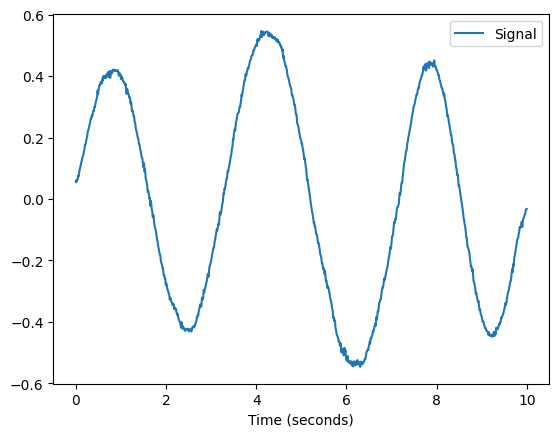

c:\BEST-Course-2025-Materials\.venv\Lib\site-packages\neurokit2\signal\signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
c:\BEST-Course-2025-Materials\.venv\Lib\site-packages\neurokit2\rsp\rsp_symmetry.py:90: NeuroKitWarning: Not enough peaks and troughs (signal too short?) to compute symmetry, returning nan for symmetry.
  warn(
c:\BEST-Course-2025-Materials\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129729 (\N{LUNGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


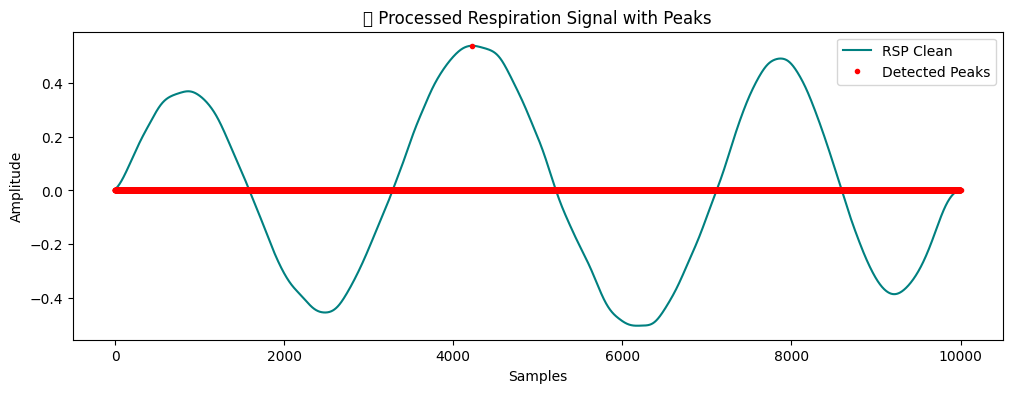


📊 Available columns in processed signal:
['RSP_Raw', 'RSP_Clean', 'RSP_Amplitude', 'RSP_Rate', 'RSP_RVT', 'RSP_Phase', 'RSP_Phase_Completion', 'RSP_Symmetry_PeakTrough', 'RSP_Symmetry_RiseDecay', 'RSP_Peaks', 'RSP_Troughs']

🔍 First 5 rows of processed signal:
    RSP_Raw  RSP_Clean  RSP_Amplitude  RSP_Rate   RSP_RVT  RSP_Phase  \
0  0.054850   0.004255       0.995609       NaN  0.333619        NaN   
1  0.055273   0.004528       0.995609       NaN  0.333624        NaN   
2  0.055853   0.004804       0.995609       NaN  0.333628        NaN   
3  0.056599   0.005085       0.995609       NaN  0.333633        NaN   
4  0.057514   0.005369       0.995609       NaN  0.333637        NaN   

   RSP_Phase_Completion  RSP_Symmetry_PeakTrough  RSP_Symmetry_RiseDecay  \
0                   0.0                      NaN                     NaN   
1                   0.0                      NaN                     NaN   
2                   0.0                      NaN                     NaN   
3

In [4]:
# Set sampling rate
sr = 1000  # 1000 Hz for smooth respiration curve

# Simulate a respiration signal
rsp_signal = nk.rsp_simulate(duration=10, sampling_rate=sr, respiratory_rate=15)

# Plot raw simulated RSP signal
nk.signal_plot(rsp_signal, sampling_rate=sr)
plt.show()

# Process the respiration signal
signals, info = nk.rsp_process(rsp_signal, sampling_rate=sr)

# Plot processed signal: Clean signal and RSP peaks
plt.figure(figsize=(12, 4))
plt.plot(signals["RSP_Clean"], label="RSP Clean", color='teal')
plt.plot(signals["RSP_Peaks"] * signals["RSP_Clean"].max(), 'r.', label="Detected Peaks")
plt.title("🫁 Processed Respiration Signal with Peaks")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# Print info
print("\n📊 Available columns in processed signal:")
print(signals.columns.tolist())

print("\n🔍 First 5 rows of processed signal:")
print(signals.head())